In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Data Okumak
df = pd.read_csv("netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Boş değerleri Doldurma
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
for col in df.columns:
    print(f"Column: {col}")
    N= df[col].isnull()
    if N.any():
        print(f"\tNull değerler var --> {col}")
        mode_value = df[col].mode().iloc[0]
        print(f"\t\tMode değeri ile dolduruluyor --> {mode_value}")
        df[col].fillna(mode_value, inplace= True)

Column: show_id
Column: type
Column: title
Column: director
	Null değerler var --> director
		Mode değeri ile dolduruluyor --> Rajiv Chilaka
Column: cast
	Null değerler var --> cast
		Mode değeri ile dolduruluyor --> David Attenborough
Column: country
	Null değerler var --> country
		Mode değeri ile dolduruluyor --> United States
Column: date_added
	Null değerler var --> date_added
		Mode değeri ile dolduruluyor --> January 1, 2020
Column: release_year
Column: rating
	Null değerler var --> rating
		Mode değeri ile dolduruluyor --> TV-MA
Column: duration
	Null değerler var --> duration
		Mode değeri ile dolduruluyor --> 1 Season
Column: listed_in
Column: description


In [11]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Date Sütunundan yararlanmak:
df["date_added"]

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [18]:
df["date_added"] = pd.to_datetime(df["date_added"], format='mixed')
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month
df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9


## Görselleştirmeler 

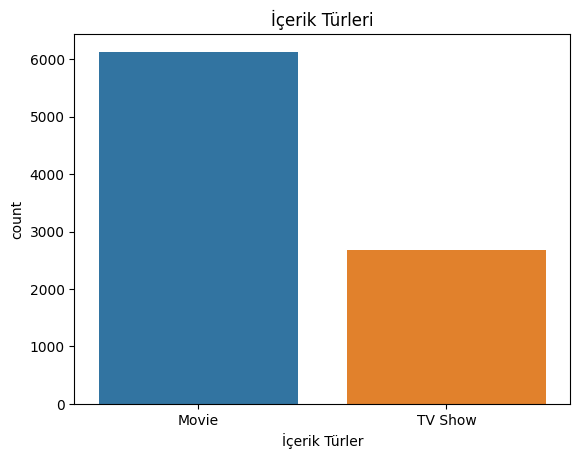

In [14]:
# Tip kolonunu görselleştirmek:
sns.countplot(data=df, x = "type")
plt.xlabel("İçerik Türler")
plt.title("İçerik Türleri")

plt.show()

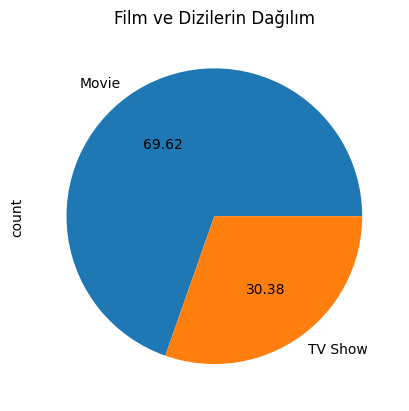

In [15]:
# Tip kolonunu görselleştirmek:
df["type"].value_counts().plot(kind="pie", autopct= "%1.2f")
plt.title("Film ve Dizilerin Dağılım")
plt.show()

In [16]:
# Hangi 10 Ülke en çok içerik üretmiş?
top_country= df["country"].value_counts().head(10)
top_country

country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

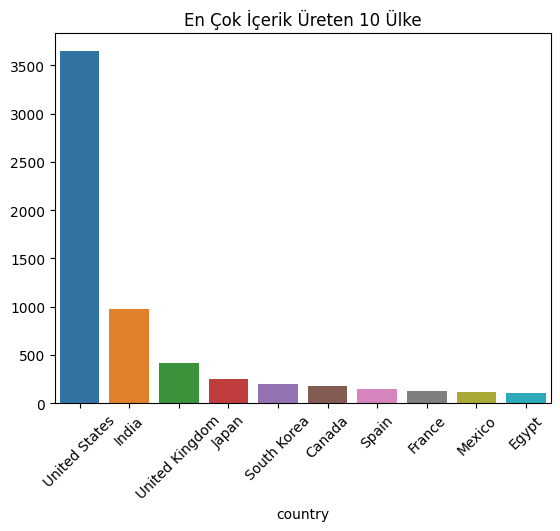

In [17]:
sns.barplot(x=top_country.index, y=top_country.values)
plt.title("En Çok İçerik Üreten 10 Ülke")
plt.xticks(rotation= 45)
plt.show()

In [23]:
movie_count = df[df["type"] == "Movie"].groupby(["year_added", "month_added"])
df_movie_count = movie_count.size().reset_index(name="count")
df_movie_count

,year_added,month_added,count
0,2008,1,1
1,2009,5,1
2,2009,11,1
3,2010,11,1
4,2011,5,1
...,...,...,...
100,2021,5,94
101,2021,6,124
102,2021,7,169
103,2021,8,117


In [27]:
# pivot table ~ Heat map 
heat_map_data = df_movie_count.pivot_table(values="count", index="year_added", columns="month_added", fill_value=0)
heat_map_data

month_added,1,2,3,4,5,6,7,8,9,10,11,12
year_added,,,,,,,,,,,,
2008,1,0,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,1,0,0,0,0,0,1,0
2010,0,0,0,0,0,0,0,0,0,0,1,0
2011,0,0,0,0,1,0,0,0,1,11,0,0
2012,0,1,0,0,0,0,0,0,0,0,1,1
2013,0,0,0,0,0,0,0,0,1,1,2,2
2014,2,1,0,1,0,1,1,1,1,4,2,5
2015,1,3,3,1,5,4,5,2,6,10,2,14
2016,15,9,14,14,9,11,19,23,29,32,26,52


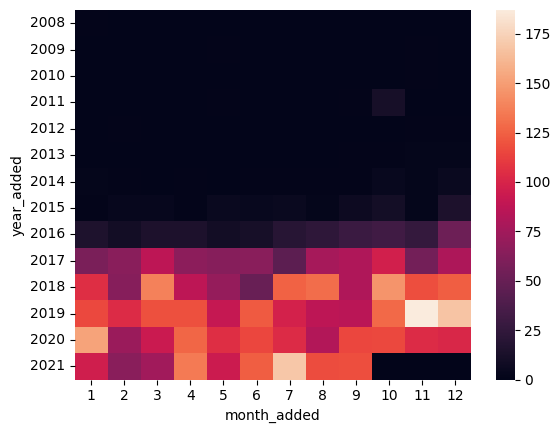

In [30]:
sns.heatmap(heat_map_data)

plt.show()

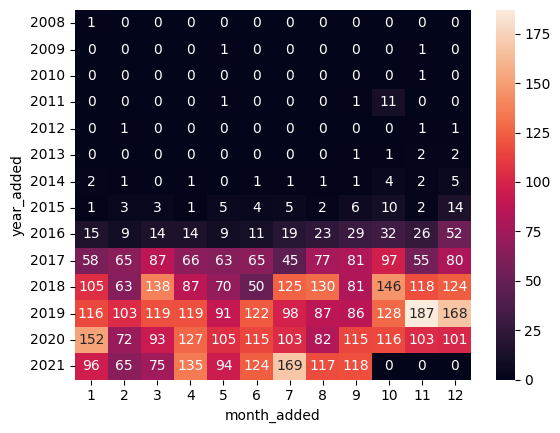

In [33]:
# İçinde değer yazan Heat Map
sns.heatmap(heat_map_data, annot=True, fmt="d")

plt.show()

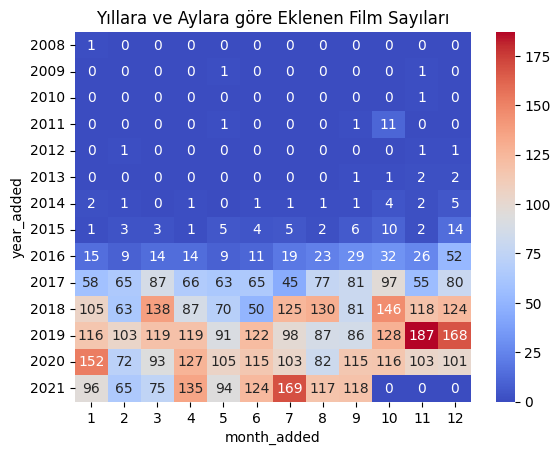

In [35]:
# Color Map değiştiren Heatmap
sns.heatmap(heat_map_data, annot=True, fmt="d", cmap="coolwarm")

plt.title("Yıllara ve Aylara göre Eklenen Film Sayıları")
plt.show()

In [36]:
# rlease year ve türlere göre dağılım:
relase_year = df.groupby(["release_year","type"]).size().reset_index(name="count")
relase_year

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


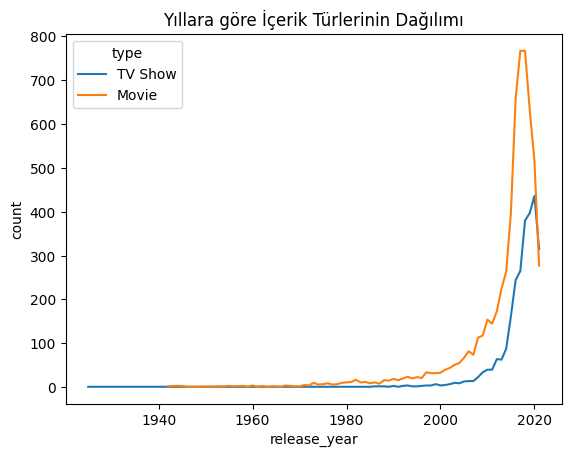

In [38]:
# Line Plot ile yıllara göre içerik türlerinin dağılımı:
sns.lineplot(data=relase_year, x="release_year", y="count", hue="type")

plt.title("Yıllara göre İçerik Türlerinin Dağılımı")
plt.show()

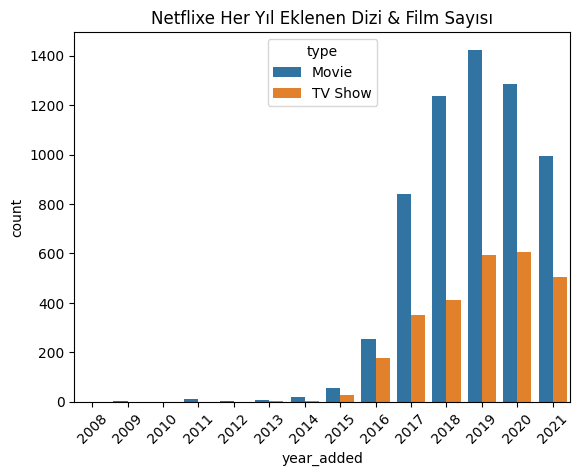

In [39]:
# Bar Plot Gösterimi:
content_counts = df.groupby(["year_added","type"]).size().reset_index(name="count")

sns.barplot(x="year_added", y="count", data=content_counts, hue="type")


plt.xticks(rotation=45)
plt.title("Netflixe Her Yıl Eklenen Dizi & Film Sayısı")
plt.show()